In [2]:
from time import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline  

# Homework 1

Nombre: Gabriel Oña

Clase: Estructura de Datos 2075

Código: 00320597

### 1. Assume we implemented an algorithm that has complexity approximately $n*log(n)$ . How much faster is this implementation compared to one of complexity $n^2$? 

Suponiendo que la complejidad del algoritmo 1 es: $O(nlog(n))$ y el algoritmo 2 es $O(n^2)$ en el peor de los casos, se puede graficar la complejidad de ambas funciones.

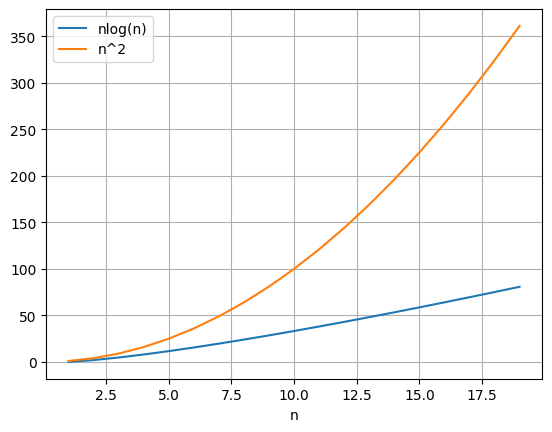

In [3]:
"""
Gráfica de función nlog(n) y n^2
Se usa la libreria pandas y matplotlib
Como se indicó en clase, la funcion log(n) se la considera como log_2(n)
"""
plot1 = pd.DataFrame() #Estructura de datos que permite hacer vectores con identificadores
plot1['n'] = np.arange(1,20,1) #Set 'n' en un vector de 1 al 20 en pasos de n = 1
plot1['n^2'] = np.power(plot1['n'], 2) #Set 'n^2'
plot1['nlog(n)'] = plot1['n'] * np.log2(plot1['n']) #Set 'nlogn'

#Plot
plot1.plot(x='n', y=['nlog(n)', 'n^2']) 
plt.grid()

Como podemos observar, la funcion $nlog(n)$ siempre se encuentra por debajo de la curva de la función $n^2$. Por lo tanto, se puede concluir que el algoritmo con $O(nlog(n))$ va a ser más rápido que un algoritmo $O(n^2)$.

Finalmente, para obtener cuánto más rápido es el algoritmo $O(nlog(n))$ comparado con $O(n^2)$ hacemos el siguiente cálculo:

$$ O(nlog(n))c = O(n^2) $$

$$ nlog(n)c =  n^2 $$

$$ c = \frac{n}{log(n)}$$

Por lo tanto el algoritmo $O(nlog(n))$ es $\frac{n}{log(n)}$ veces más rápido que $O(n^2)$.

## 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime


In [5]:
n = np.array([1000.0,2000.0,4000.0,8000.0,16000.0,32000.0,64000.0])    #Def. Array n
t = np.array([0.0,0.02,0.2,0.6,2.6,10.4,41.6])      #Def. T(n)

#Se usan estos dos arreglos de numpy en un DataFrame de pandas para visualizar los datos
plot2 = pd.DataFrame()
plot2['n'] = n
plot2['runtime -- T(n)'] = t
plot2.columns = ['n', 'runtime -- T(n)']

plot2

,n,runtime -- T(n)
0,1000.0,0.00
1,2000.0,0.02
2,4000.0,0.20
3,8000.0,0.60
4,16000.0,2.60
5,32000.0,10.40
6,64000.0,41.60


En primer lugar, se debe graficar los datos para tener una percepción de la función T(n)

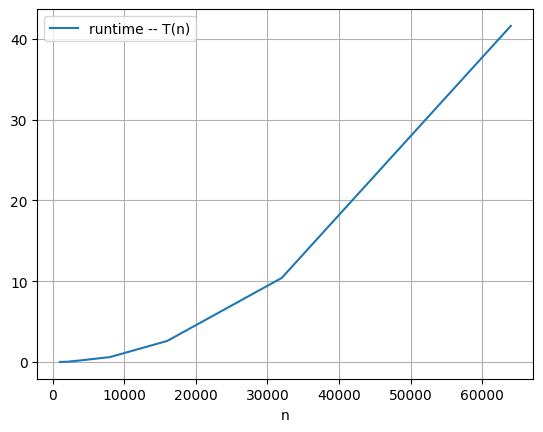

In [6]:
#Plot de T(n) vs n
plot2.plot(x='n', y='runtime -- T(n)')      
plt.grid()

Mi hipótesis es que tiene una tendencia cuadrática.

$$T(n) = An^2 + Bn + C$$

Para $T(0) = 0$, porque no se realiza ningún cálculo computacional. Por lo tanto, $C = 0$.

Para $n = 4000$, tenemos: $0.2 = A(4000)^2 + B(4000)$.

Para $n = 32000$, tenemos: $10.40 = A(32000)^2 + B(32000)$. 

Tenemos un sistema de ecuaciones lineales con dos incógnitas. El resultado es el siguiente:

$$ A = 9.82 \times 10^{-9}$$
$$ B = 1.07 \times 10^{-5}$$
$$ T(n) = 9.82 \times 10^{-9} n^2 + 1.07 \times 10^{-5} n $$


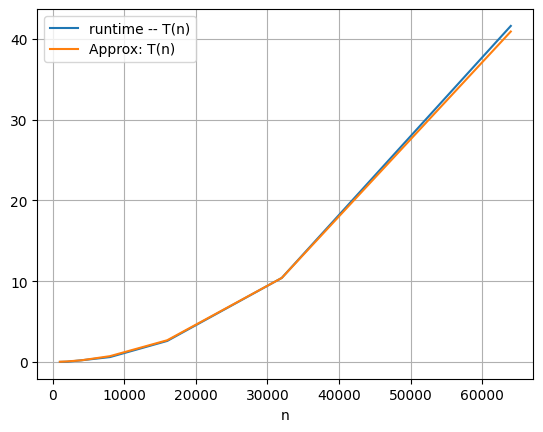

In [8]:
A = 9.82*10**(-9)      #Set. constantes
B = 1.07*10**(-5)

t1 = A*n**2 + B*n       #Definimos el array de numpy del tiempo de la aproximacion
plot2['Approx: T(n)'] = t1     #Añado en el DataFrame

#Plot
plot2.plot(x='n', y=['runtime -- T(n)','Approx: T(n)'])   
plt.grid()


Por lo tanto, se pude apreciar que el crecimiento del tiempo de ejecución de los datos del problema se los puede aproximar, con bastante precisión, con una función cuadrática del tipo:

$$ T(n) = 9.82 \times 10^{-9} n^2 + 1.07 \times 10^{-5} n $$

## 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

In [ ]:
def func1(n):
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum

Se considera 1 operación la lectura y 1 la escritura de una variable. Por lo tanto, identificando el número de operaciones en cada línea de código.

In [ ]:
def func1(n):   #c1 op - 1 vez
    A = range(0,n)  #c2 op - 1 vez
    sum = 0 #c3 op - 1 vez
    i = 0   #c4 op - 1 vez
    for x in A[i:]: #c5 op - sum_i=1 ^n (i) veces
        i += 1  #c6 op - sum_i=1 ^n (i)
        for j in range(i, len(A)):  #c7 op - n-i veces
            y = A[j] #c8 op - n-i veces
            k = j   #c9 op - n-i veces
            while k < len(A):   #c10 op - n-i veces 
                                #Este while esta funcionando como un for loop
                z = A[k]    #c11 op - n-i veces
                k = 2*k     #c12 op - n-i veces
                if x + y <= z:  #c13 op - n-i veces
                    sum += 1 #c14 op - n-i veces
    return sum  #c15 - 1 vez

Se obtiene la siguiente función de complejidad del algoritmo.

$$T(n) = c1+c2+c3+c4+ \sum_{i=0}^{n-1}\{c5i + c6i + i\sum_{j=i}^{n-1}[c7+c8+c9+\sum_{j=i}^{n-1}(c10+c11+c12+c13+c14)]\} + c15

Sea:

$a = c1+c2+c3+c4+c15 $

$b = c5+c6$

$c = c7+c8+c9$

$d = c10+c11+c12+c13+c14$

Se puede escribir $T(n)$ de la siguiente forma:

$$ T(n) = a + \sum_{i=0}^{n-1}\{bi+ i\sum_{j=i}^{n-1}[c+\sum_{j=i}^{n-1}(d)]\}$$

$$ T(n) = a + \sum_{i=0}^{n-1}\{bi+ i\sum_{j=i}^{n-1}[c+d((n-1)-i+1)]\}$$

$$ T(n) = a + \sum_{i=0}^{n-1}\{bi+ i\sum_{j=i}^{n-1}[c+d(n-i)]\}$$

$$ T(n) = a + \sum_{i=0}^{n-1}\{bi+ i(c+d(n-i))(n-i)\}$$

$$ T(n) = a + \sum_{i=0}^{n-1}\{bi+ cni-ci^2+ idn^2-2dni^2+di^3\}$$

$$ T(n) = a + (b+cn+dn^2)\frac{n(n+1)}{2} - (c+2dn)\frac{n(n+1)(2n+1)}{6} + d\frac{n^2(n+1)^2}{4}$$

O escrito de otra forma:

$$ T(n) = \left(\frac{d}{12}\right)n^4 + \left(\frac{c}{6}\right)n^3 + \left(\frac{b}{2} - \frac{d}{12} \right)n^2 + \left(\frac{b}{2} - \frac{c}{6} \right)n + a $$

Por lo tanto, la complejidad del algoritmo es de un polinomio de orden 4:

$$O(n^4)$$

## 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

In [9]:
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

Now consider a different function that does the same thing.

In [10]:
def sum2(n): 
    total = n*(n+1)//2
    return total

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$

2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9] $

3. Plot the runtime as a function of  for both functions in the same figure.
    * Use different line colors and markers to help distinguish between the two curves.

4. Analytically estime the runtime functions for the functions sum1 and sum2. Call them $T_1(n)$ and $T_2(n)$. 
    * Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different.

5. How long will it take to run the code for $n=10^{100}$ using sum1 and sum2? What are your main impressions about the difference?

**Hint**: Use and modify the code from the slides to get and plot the runtime

### Resolución:

1.

In [11]:
n=np.array([5,8,103,527])       #Test array

S1 = np.empty(len(n))       #Defino 2 arreglos resultantes para los dos algoritmos
S2 = np.empty(len(n))

for i in range(0,len(n)):       #Realizo la suma con cada algoritmo y lo guardo en el arreglo respectivo
    S1[i] = sum1(n[i])
    S2[i] = sum2(n[i])

#Print
print("Resultado funcion sum1: ")
print(S1)
print("")

print("Resultado funcion sum2: ")
print(S2)


Resultado funcion sum1: 
[1.50000e+01 3.60000e+01 5.35600e+03 1.39128e+05]

Resultado funcion sum2: 
[1.50000e+01 3.60000e+01 5.35600e+03 1.39128e+05]


2.

In [16]:
#Decorador para calcular el tiempo de ejecucion de una funcion

from time import sleep

def calculo_tiempo(funcion):
    """
        En este decorador se crea un arreglo de dos dimensiones,
        la primera con el resultado de la funcion y el segundo
        con el tiempo de ejecucion de la misma.
    """

    #Se usa el sleep de 1s porque sino el resultado que devuelve es 0 por algun proceso interno de la computadora.
    def wrapper(*args, **kwargs):
        result = [0,0]    #Declaramos el arreglo
        start = 10**6*time()    #Se toma el tiempo inicial
        sleep(1)    #Espera de 1s
        result[0] = funcion(*args, **kwargs)    #Se ejecuta la función
        result[1] = 10**6*time() - start - 10**6    #Se toma la diferencia de tiempos menos 1s
        return result  
    return wrapper

In [17]:
@calculo_tiempo     #Decorador runtime
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

In [18]:
@calculo_tiempo     #Decorador runtime
def sum2(n): 
    total = n*(n+1)//2
    return total

In [19]:
n=np.array([1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9])  #Declaro array dado

T1 = np.empty(len(n))   #Declaro arreglos resultantes
T2 = np.empty(len(n))

for i in range(0,len(n)):   #Calculo el tiempo de ejecucion de cada algoritmo, se encuentra en la posicion [1] devuelta por el decorador
    T1[i] = sum1(n[i])[1]
    T2[i] = sum2(n[i])[1]

#Prints
print("Valores de n: ")
print(n)
print("")

print("Tiempo de la funcion sum1: ") 
print(T1)
print("")

print("Tiempo de la funcion sum2: ")
print(T2)

C:\Users\gsoch\AppData\Local\Temp\ipykernel_7488\3200809269.py:3: RuntimeWarning: overflow encountered in long_scalars
  total = n*(n+1)//2


Valores de n: 
[         1         10        100       1000      10000     100000
    1000000   10000000  100000000 1000000000]

Tiempo de la funcion sum1: 
[8.19575000e+03 6.57925000e+03 5.02375000e+03 1.39555000e+04
 1.50435000e+04 1.26650000e+04 4.12052500e+04 4.26536250e+05
 4.25546350e+06 4.34279552e+07]

Tiempo de la funcion sum2: 
[ 9919.75  5459.    5306.75  6101.75  7605.25  5959.75 10272.   11922.5
  9437.5   1535.75]


3.

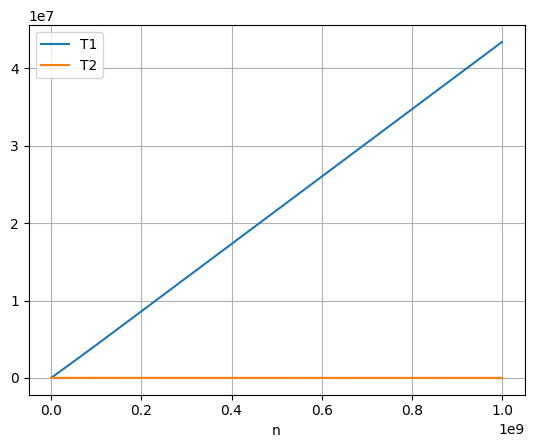

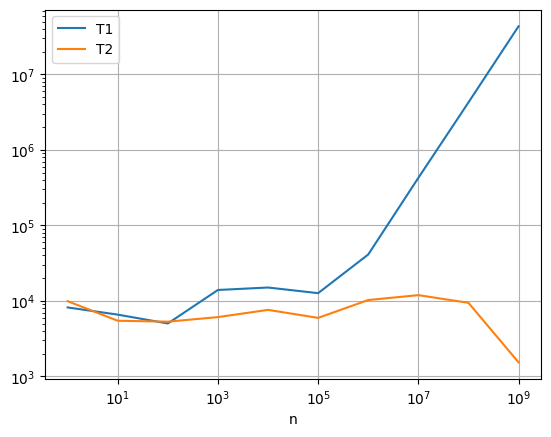

In [24]:
plot2 = pd.DataFrame()
plot2['T1'] = T1    #A los resultados se los incluye en un DataFrame para visualizarlos
plot2['T2'] = T2
plot2['n'] = n

#Plot
plot2.plot(x='n', y= ['T1','T2'])
plt.grid()
plot2.plot(x='n', y= ['T1','T2'], loglog=True)  #Ejes logaritmicos
plt.grid()

4.

Llamemos $T_1(n)$ a la funcion de complejidad del algoritmo sum1. Identificamos la complejidad a continuacion:

In [ ]:
def sum1(n): #1 - 1 vez
    total = 0   #1 - 1 vex
    for i in range(1, n+1): #2 - n veces
        total += i  #2 - n veces lectura de i y escritura en total
    return total    #1 - 1 vez

$$T_1(n) = 1+1+2n+2n+1$$

Por lo tanto, ordenando obtenemos:

$$T_1(n) = 4n + 3$$

Se concluye que la complejidad de este algoritmo es $O(n)$ lineal.

Ahora llamemos $T_2(n)$ a la funcion de complejidad del algoritmo sum2 detallada a continuacion:

In [ ]:
def sum2(n):    #1 - 1 vez
    total = n*(n+1)//2  #3 - 1 vez dos lecturas y una escritura
    return total    #1- 1 vez

$$T_2(n) = 1+3+1 = 4$$ 

Por lo tanto la complejidad de $T_2(n)$ es $O(1)$ constante.

5.

Teoricamente, usando como referencia un microprocesador funcionando a 3GHz, calcular $n = 10^{100}$, se tardaría:

$T_1(10^{100}) = 4\times 10^{100}+3 $ procesos.

Y cada proceso se lo realiza en $3.33\times 10^{-10} [s]$

Tenemos un tiempo de $t=1.33\times 10^{91} [s]$

$$t_1=4.22\times 10^{83} [Años]$$

Mientras que $T_2(10^{100}) = 4 $ procesos.

$$t_2= 1.33 [ns]$$

La diferencia entre las dos estimaciones es colosal, por lo que demuestra la importancia de utilizar el algoritmo más eficiente en nuestras aplicaciones para que los tiempos de ejecución sean los más óptimos posibles.

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$


<img src="1.jpg"  />

<img src="2.jpg"  />

### 6. Sort the following functions in decreasing order of asymptotic complexity $O(f(n))$:

* $f_1(n) = \sqrt{n}$
* $f_2(n) = n^3$
* $f_3(n) = \binom{n}{4}$
* $f_4(n) = \sum_{i=2}^{n}(i-1)$

En primer lugar, se tiene que expresar a las 4 funciones de forma reducida:

$f_1(n) = \sqrt{n}$

$f_2(n) = n^3$

$f_3(n) = \frac{n!}{4!(n-4)!}$

$f_4(n) = \sum_{i=1}^{n-1}(i-1) = \sum_{i=1}^{n-1}(i)-(n-1) = \frac{(n-1)(n)}{2} - (n-1) = \frac{1}{2}n^2 - \frac{3}{2}n + 1$

Posteriormente, se grafica las 4 funciones.


In [262]:
plot4 = pd.DataFrame()  #Defino los DataFrame de cada funcion
plot4['n'] = np.arange(0,10,1)
plot4['f1'] = np.sqrt(plot4['n'])   #f1
plot4['f2'] = np.power(plot4['n'],3)    #f2

#La funcion factorial hay que definirla manualmente porque no es valida para n<5
res = np.zeros(len(plot4['n']))
for i in range (5,len(plot4['n'])):     #No se admite factoriales negativos
    res[i] = (math.factorial(plot4['n'][i]))/(math.factorial(4)*math.factorial(plot4['n'][i]-4))    
plot4['f3'] = res   #f3
plot4['f4'] = (np.power(plot4['n'],2)/2) - (3*plot4['n']/2) + 1     #f4

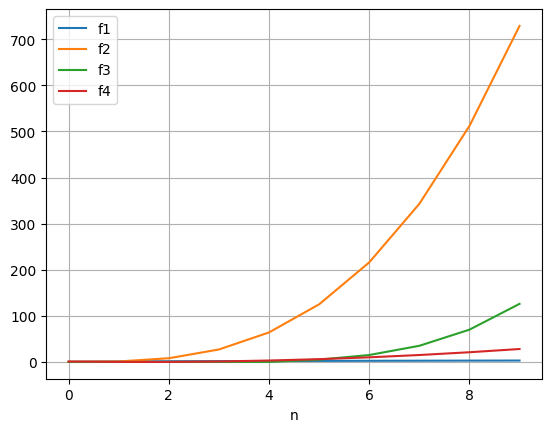

In [264]:
#Plot
plot4.plot(x='n', y= ['f1','f2','f3','f4'])
plt.grid()

Por lo tanto, se puede ordenar a las funciones de forma decreciente de la siguiente manera:

$f_2(n) = n^3$

$f_3(n) = \frac{n!}{4!(n-4)!}$

$f_4(n) = \frac{1}{2}n^2 - \frac{3}{2}n + 1$

$f_1(n) = \sqrt{n}$

De donde se puede concluir que:

$O(n^3) > O\left(\frac{n!}{4!(n-4)!}\right) > O(\frac{1}{2}n^2 - \frac{3}{2}n + 1) > O(\sqrt{n})$

Simplificando, se obtiene el siguiente resultado:

$$ O(n^3) > O\left(\binom{n}{4}\right) > O(n^2) > O(\sqrt{n}) $$

### 7. Implement the methods of the class Array that deal with deletion of elements. Consider the 3 cases we considered in class.

Definicion de la clase Array

In [81]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        """
        Initialize the class
        """
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n) 
        if values:
            self.initialize_array(values)

    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1       
    
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item
    
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

Search method

In [82]:
class Array(Array):
    def linear_search(self, element):
        """
        Return the index of element
        """
        for i in range(self.l):
            if self[i] == element:
                return i
        return None

Insert method

In [83]:
class Array(Array):
    def insert_to_tail(self, item):
        """
        Add new item to the tail of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.array[self.l] = item
        self.l += 1
    
    def insert_to_head(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        i = self.l
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.l += 1

    def insert(self, index, element):
        """
        Implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1

Se implementa el método para eliminar elementos del array. 
Tenemos 3 casos:

* Eliminar el último elemento.
* Eliminar el primer elemento.
* Eliminar en el índice dado.

Delete the last element

In [227]:
class Array(Array):
    def delete_tail(self):
        """
        Borra el último item del array
        """
        if self.l != 0: #Solo se borra si el arreglo no está vacio. Esto previene el caso especial self.l = 0
            self.array[self.l-1] = None   #Setting el ultimo item (self.l) to None
            self.l -= 1     #Se reduce el tamaño de self.l

        #No se llama a la funcion raise porque el programa pararía si se borra un arreglo vacio.
        #Si el arreglo es vacio, no se hace nada.

In [265]:
A = Array(5,[1,2,3,4,5])
A.list_array()

'1, 2, 3, 4, 5'

In [266]:
A.delete_tail()
A.list_array()

'1, 2, 3, 4, _'

Delete the first element

In [208]:
class Array(Array):
    def delete_head(self):
        """
        Borra el primer item del arreglo
        """
        if self.l != 0: #Previene el caso especial self.l = 0
            i = 0
            #Cuando i = self.l = self.n ya no existe el indice i+1. 
            while (i < self.l-1):   #Termina 2 espacios antes que el final por < y por self.l-1
                self.array[i] = self.array[i+1]     #Desplazo valores del arreglo
                i += 1
            self.array[self.l-1] = None     #Set. ultimo valor = None
            self.l -= 1   #Reduzco la longitud del arreglo
        
        #No se llama a la funcion raise porque el programa pararía si se borra un arreglo vacio.
        #Si el arreglo es vacio, no se hace nada.
            

In [267]:
A = Array(5,[1,2,3,4,5])
A.list_array()

'1, 2, 3, 4, 5'

In [268]:
A.delete_head()
A.list_array()

'2, 3, 4, 5, _'

Delete using index

In [252]:
class Array(Array):
    def delete(self,index):
        """
        Borro el item en el indice dado
        """
        if self.l> 0 and index >= 0 and index < self.l:     #Si el index está dentro de 0 a self.l
            #Se realiza el mismo proceso que delete head solo que desde i = index
            i = index
            while (i < self.l-1):   
                self.array[i] = self.array[i+1]   
                i += 1
            self.array[self.l-1] = None
            self.l -= 1  
        #Si el indice es mayor a self.l y menor a self.n, la funcion no debe hacer nada porque esos valores ya son None.
        elif self.l >= 0 and index >= self.l and index < self.n:    
            pass
        else:
        #Si no estoy en ninguno de los otros casos, el indice está fuera del arreglo
            raise IndexError("Index out of range")

In [253]:
A = Array(5,[1,2,3,4,5])
A.list_array()

'1, 2, 3, 4, 5'

In [254]:
A.delete(3)
A.list_array()

'1, 2, 3, 5, _'